In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from ray import tune

In [179]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATSx
from neuralforecast.losses.pytorch import MQLoss, DistributionLoss, MAE, MSE, RMSE
from neuralforecast.tsdataset import TimeSeriesDataset
from neuralforecast.losses.numpy import rmse, mape
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [4]:
from neuralforecast.models import NHITS

In [5]:
from neuralforecast.utils import AirPassengers, AirPassengersPanel, AirPassengersStatic

In [6]:
df = pd.read_excel('NASDAQ Realized Volatility (NBEATSx).xlsx',index_col='Date',parse_dates=True)

In [13]:
Y_train = df[:1005]

In [14]:
Y_train.reset_index(inplace=True)

In [15]:
Y_train.rename(columns={'Date':'ds'}, inplace=True)

In [16]:
Y_train.rename(columns={'Realised':'y'}, inplace=True)

In [17]:
Y_train.tail(252)

,index,ds,unique_id,y,US Financial Turbulence,Covid,VIX
753,753,2020-10-30,Airline1,0.017831,715.890512,0,38.02
754,754,2020-11-02,Airline1,0.017217,615.136341,0,37.13
755,755,2020-11-03,Airline1,0.013149,751.131348,0,35.55
756,756,2020-11-04,Airline1,0.028572,833.304523,0,29.57
757,757,2020-11-05,Airline1,0.020493,780.247181,0,27.58
...,...,...,...,...,...,...,...
1000,1000,2021-10-25,Airline1,0.008532,404.686444,0,15.24
1001,1001,2021-10-26,Airline1,0.009583,616.042317,0,15.98
1002,1002,2021-10-27,Airline1,0.007038,739.161544,0,16.98
1003,1003,2021-10-28,Airline1,0.006594,679.375691,0,16.53


<AxesSubplot:>

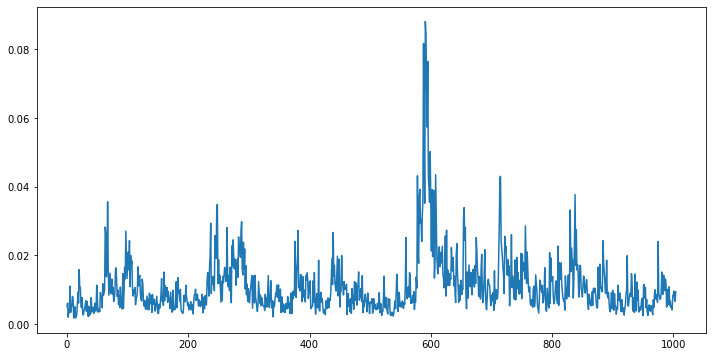

In [18]:
Y_train["y"].plot(figsize=(12,6))

# Validation

In [86]:
RMSE=[]
Accuracy=[]

In [87]:
model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=27621)
fcst = NeuralForecast(
    models=[model],
    freq=CustomBusinessDay(calendar=USFederalHolidayCalendar())
)
forecasts = fcst.cross_validation(df=Y_train,val_size=1,static_df=AirPassengersStatic,n_windows=None, test_size=99,step_size=1)

Global seed set to 27621


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [88]:
Y_hat_df = forecasts.reset_index(drop=False).drop(columns=['unique_id','ds','US Financial Turbulence','VIX','Covid','index','cutoff'])
Y_hat=Y_hat_df["NBEATSx"].values
Y_true=Y_hat_df["y"].values
RMSE.append(rmse(y=Y_true, y_hat=Y_hat))
Accuracy.append((1-mape(y=Y_true, y_hat=Y_hat))*100)

In [89]:
RMSE

[0.0013721540735898824]

In [90]:
Accuracy

[88.15465603841177]

Random seed was chosen as the day, month and year of the experiment
Input size 21
model = NBEATSx(h=1, input_size=21,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=542023)

RMSE=0.0019209189527758714
Accuracy=76.46680565288551

Input size 63
model = NBEATSx(h=1, input_size=63,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=542023)

RMSE=  0.0015901751063493199
Accuracy= 80.4665783376845

Input size 84
model = NBEATSx(h=1, input_size=84,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=542023)

RMSE= 0.0017459611821857245
Accuracy= 77.40359060744498

Input size 126
model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=542023)

RMSE= 0.0016509567403592213
Accuracy= 82.18769553060771

Input size 189
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=542023)

RMSE= 0.0017743114368821472
Accuracy=77.18262064108016

Input size 252
model = NBEATSx(h=1, input_size=252,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=542023)

RMSE= 0.0018063788221766826
Accuracy= 78.43570641825191

Input size 126 was chosen
Changing random seed to 1 for other hyperparameters selection

model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=1)

RMSE=0.0016566171817311754
Accuracy=81.90063883472072

Scaler type = standard
model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='standard',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=1)

RMSE= 0.001812425523393104
Accuracy= 80.16449978829955

Robust was chosen as scaler type

n_blocks = [1,1]
model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=1)

RMSE=0.0013741592039604566
Accuracy=88.28505239806672

n_blocks = [2,2]
model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[2, 2],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=1)

RMSE=0.001479153514437873
Accuracy=86.11517336186496

n_blocks = [3,3]
model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[3, 3],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=1)

RMSE=0.001554342911871
Accuracy=83.85793741609127

n_blocks = [1,1] was chosen
Changing random seed to 27621 for remaning hyperparameters selection

model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=27621)

RMSE=0.0013721540735898824
Accuracy=88.15465603841177

n_harmonics=0, n_polynomials=0,
model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=27621)

RMSE=0.0013721540735898824 (no change as only identity stack types are being use due to the lack of seasonality or trend in the time series)
Accuracy=88.15465603841177 (no change as only identity stack types are being use due to the lack of seasonality or trend in the time series)

Hyperparameters selection finalized


Model choice

model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['US Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=27621)

In [91]:
Y_train = df
Y_train.reset_index(inplace=True)
Y_train.rename(columns={'Date':'ds'}, inplace=True)
Y_train.rename(columns={'Realised':'y'}, inplace=True)

In [184]:
RMSEs=[]
Accuracy=[]

In [263]:
model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=50,
                early_stop_patience_steps=0,
                random_seed=random.randint(0, 1000000))
fcst = NeuralForecast(
    models=[model],
    freq=CustomBusinessDay(calendar=USFederalHolidayCalendar())
)
forecasts = fcst.cross_validation(df=Y_train,val_size=1,static_df=AirPassengersStatic,n_windows=None, test_size=252,step_size=1)

Global seed set to 280017


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [264]:
Y_hat_df = forecasts.reset_index(drop=False).drop(columns=['unique_id','ds','US Financial Turbulence','VIX','Covid','index','cutoff'])
Y_hat=Y_hat_df["NBEATSx"].values
Y_true=Y_hat_df["y"].values
RMSEs.append(rmse(y=Y_true, y_hat=Y_hat))
Accuracy.append((1-mape(y=Y_true, y_hat=Y_hat))*100)

In [269]:
RMSEs

[0.005606242019738068,
 0.005556576517844948,
 0.005606642097227177,
 0.005545649079077254,
 0.005449401574528888,
 0.005486061487513864,
 0.005577229987547367,
 0.005573649025580699,
 0.005576544994803288,
 0.005594343687544902,
 0.0055945588803096085,
 0.005601072170149676,
 0.005591997867656445,
 0.00563526546840566,
 0.005602541251600176]

In [270]:
Accuracy

[82.63423117717745,
 82.87249698182926,
 82.48455621328958,
 82.48114711490275,
 82.2410590341587,
 81.99532386107241,
 82.68932164042596,
 82.61363913689436,
 82.59477695856596,
 82.18339658819107,
 82.40138032600304,
 82.12382746272233,
 82.46293397666133,
 82.04594650816847,
 81.77403330544001]

Text(0, 0.5, 'NASDAQ Realized Volatility')

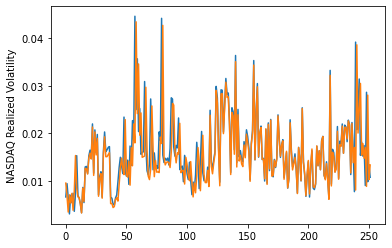

In [217]:
plt.plot(range(len(Y_hat)),Y_true)
plt.plot(range(len(Y_hat)),Y_hat)
plt.ylabel("NASDAQ Realized Volatility")

In [271]:
RMSE=RMSEs

In [272]:
print("mean: %s" %(round(np.mean(RMSE),5)*100)+"%")

mean: 0.557%


In [273]:
print("stdv: %s" %(round(np.std(RMSE),5)*100)+"%")

stdv: 0.005%


In [274]:
RMSE_CI_95_lower_bound=np.mean(RMSE)-2*np.std(RMSE)
RMSE_CI_95_upper_bound=np.mean(RMSE)+2*np.std(RMSE)
print("95 percent CI lower bound: %s" %(round(RMSE_CI_95_lower_bound,5)*100)+"%")
print("95 percent CI upper bound: %s" %(round(RMSE_CI_95_upper_bound,5)*100)+"%")

95 percent CI lower bound: 0.5479999999999999%
95 percent CI upper bound: 0.567%


In [275]:
RMSE_CI_99_lower_bound=np.mean(RMSE)-3*np.std(RMSE)
RMSE_CI_99_upper_bound=np.mean(RMSE)+3*np.std(RMSE)
print("99.7 percent CI lower bound: %s" %(round(RMSE_CI_99_lower_bound,5)*100)+"%")
print("99.7 percent CI upper bound: %s" %(round(RMSE_CI_99_upper_bound,5)*100)+"%")

99.7 percent CI lower bound: 0.543%
99.7 percent CI upper bound: 0.571%


In [276]:
Accuracy

[82.63423117717745,
 82.87249698182926,
 82.48455621328958,
 82.48114711490275,
 82.2410590341587,
 81.99532386107241,
 82.68932164042596,
 82.61363913689436,
 82.59477695856596,
 82.18339658819107,
 82.40138032600304,
 82.12382746272233,
 82.46293397666133,
 82.04594650816847,
 81.77403330544001]

In [277]:
print("mean: %s" %(round(np.mean(Accuracy),2))+"%")

mean: 82.37%


In [278]:
print("stdv: %s" %(round(np.std(Accuracy),2))+"%")

stdv: 0.29%


In [279]:
Accuracy_CI_95_lower_bound=np.mean(Accuracy)-2*np.std(Accuracy)
Accuracy_CI_95_upper_bound=np.mean(Accuracy)+2*np.std(Accuracy)
print("95 percent CI lower bound: %s" %round(Accuracy_CI_95_lower_bound,2)+"%")
print("95 percent CI upper bound: %s" %round(Accuracy_CI_95_upper_bound,2)+"%")

95 percent CI lower bound: 81.79%
95 percent CI upper bound: 82.96%


In [280]:
Accuracy_CI_99_lower_bound=np.mean(Accuracy)-3*np.std(Accuracy)
Accuracy_CI_99_upper_bound=np.mean(Accuracy)+3*np.std(Accuracy)
print("99.7 percent CI lower bound: %s" %round(Accuracy_CI_99_lower_bound,2)+"%")
print("99.7 percent CI upper bound: %s" %round(Accuracy_CI_99_upper_bound,2)+"%")

99.7 percent CI lower bound: 81.5%
99.7 percent CI upper bound: 83.25%


(array([19012., 19013., 19014., 19015., 19016., 19017., 19018.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

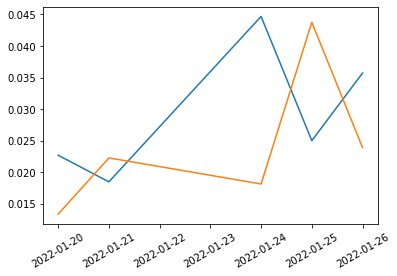

In [261]:
plt.plot(forecasts["ds"][55:60],Y_true[55:60])
plt.plot(forecasts["ds"][55:60],Y_hat[55:60])
plt.xticks(rotation=30)

(0.006, 0.028)

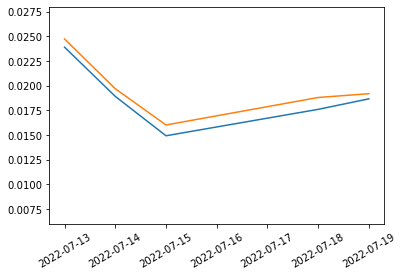

In [262]:
plt.plot(forecasts["ds"][175:180],Y_true[175:180])
plt.plot(forecasts["ds"][175:180],Y_hat[175:180])
plt.xticks(rotation=30)
ax = plt.gca()
ax.set_ylim(0.006, 0.028)